{1: {1: [(6, 2)], 2: [(6, 1)], 3: [(1, 1), (5, 1), (4, 1)], 4: [(5, 3), (1, 3), (2, 3)], 5: [(4, 3)]}, 2: {1: [(2, 3)], 2: [(2, 2), (6, 1)], 3: [(3, 2)], 4: [(6, 2)], 5: [(1, 2), (5, 3)]}, 3: {1: [(5, 3), (2, 1)], 2: [(3, 1)], 3: [(4, 2)], 4: [(2, 2), (3, 1)], 5: [(6, 3), (1, 3), (2, 1)]}, 4: {1: [(3, 1), (5, 3)], 2: [(2, 1)], 3: [(3, 1), (1, 3)], 4: [(2, 2), (4, 3)], 5: [(2, 3), (6, 3)]}, 5: {1: [(5, 2), (4, 1), (6, 1)], 2: [(1, 1)], 3: [(6, 2)], 4: [(4, 2), (5, 3)], 5: [(1, 3), (6, 2), (3, 1)]}, 6: {1: [(4, 1)], 2: [], 3: [(5, 3), (2, 1)], 4: [(6, 3), (5, 1)], 5: [(5, 3)]}, 7: {1: [], 2: [(1, 2), (6, 2)], 3: [(5, 1)], 4: [(1, 1), (5, 1)], 5: [(2, 1), (3, 3), (4, 3)]}, 8: {1: [(3, 2), (4, 3), (6, 2)], 2: [(1, 2)], 3: [(2, 1), (5, 1), (6, 3)], 4: [(1, 1)], 5: [(5, 1)]}, 9: {1: [(2, 1), (5, 3)], 2: [], 3: [(2, 2), (4, 1)], 4: [(4, 2), (3, 2), (6, 3)], 5: [(6, 2), (1, 3), (5, 2)]}, 10: {1: [(2, 1)], 2: [(2, 1), (4, 2)], 3: [(4, 3)], 4: [(5, 1), (1, 1), (6, 2)], 5: [(4, 1)]}}
{1: {1: [(6,

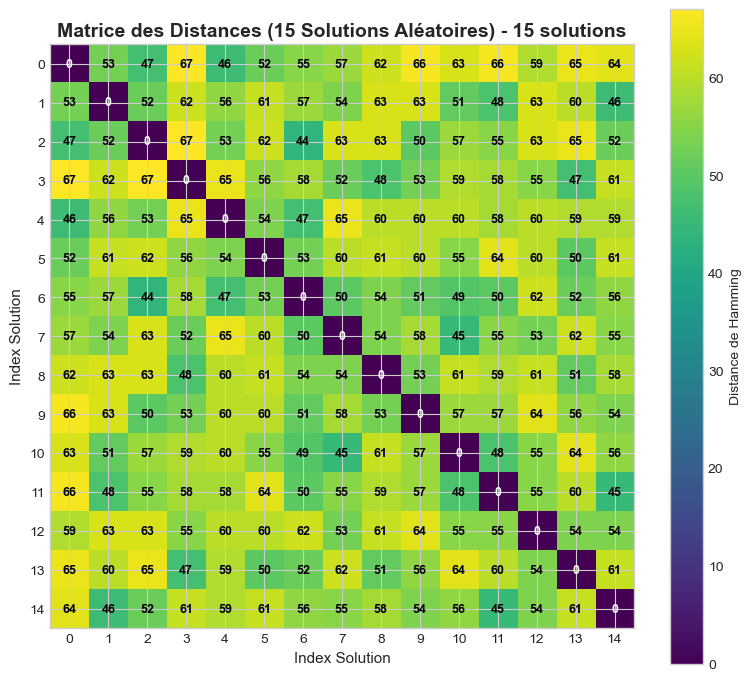


SECTION 3 : BENCHMARK - COMPARAISON MÉTAHEURISTIQUES SOLO vs COLLABORATIF
Lancement du Benchmark (50 itérations par run)...

  TABLEAU 1 : RÉSULTATS SANS/AVEC COLLABORATION
Configuration        | Makespan        | Gain vs AG Solo
---------------------------------------------------------------------------
AG                   | 35.0            | +0.00%
Tabu                 | 35.0            | +0.00%
RS                   | 35.0            | +0.00%
SMA_NoLearn          | 35.0            | +0.00%
SMA_Learn            | 35.0            | +0.00%

SECTION 4 : BENCHMARK - MODE AMIS vs MODE ENNEMIS
Exécution (100 itérations chacun)...

  TABLEAU 2 : MODE AMIS vs ENNEMIS
Mode                 | Makespan             | Amélioration
------------------------------------------------------------
Mode ENNEMIS         | 35.0                 | Référence
Mode AMIS            | 35.0                 | +0.00%

SECTION 5 : VISUALISATIONS AVANCÉES

> 5.1 Courbes de Convergence Comparatives


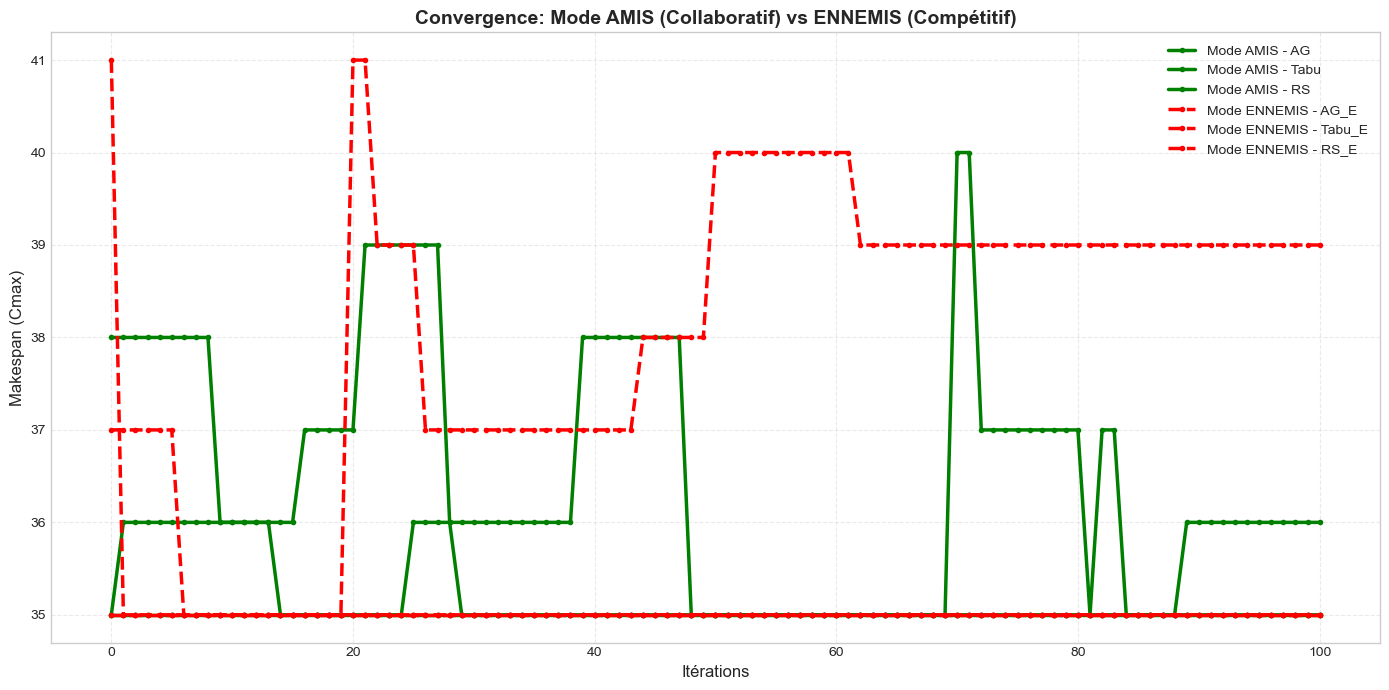


> 5.2 Gantt Final - Meilleure Solution (Mode AMIS)
Makespan final: 35 slots = 175 minutes


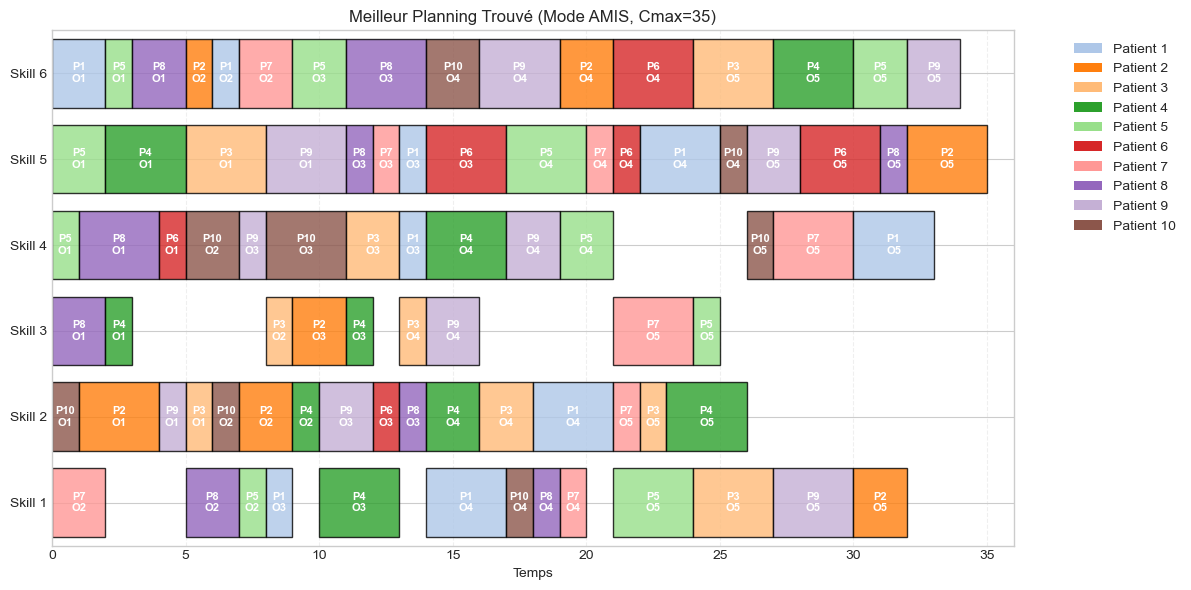


> 5.3 Matrices de Diversité (EMP)


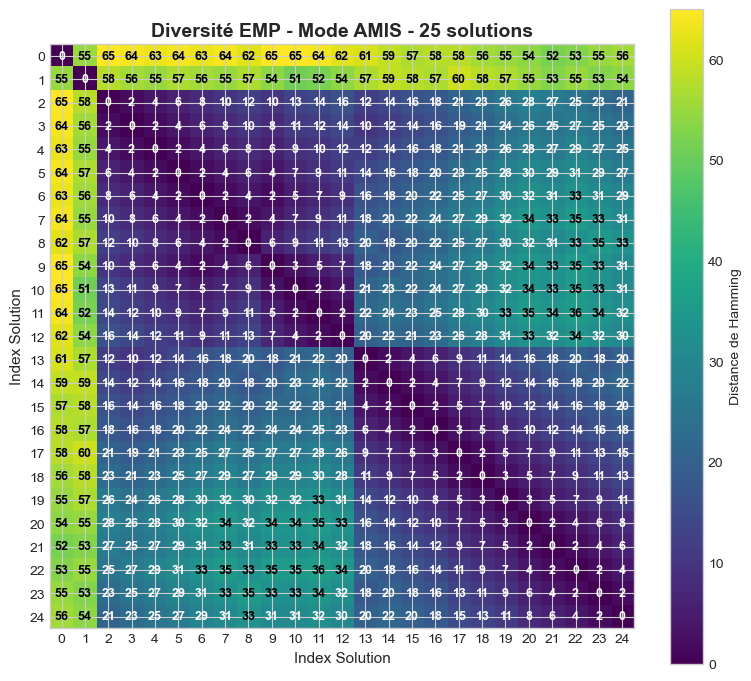

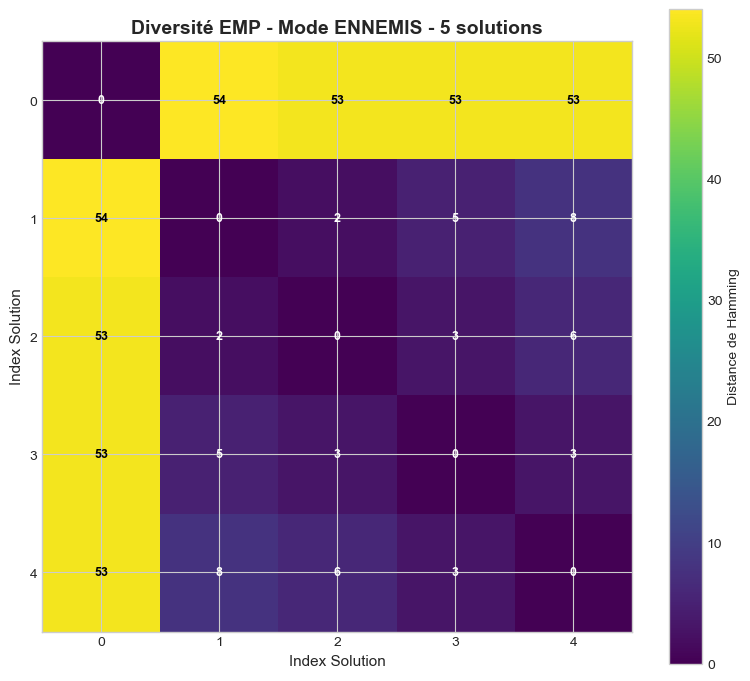


> 5.4 Visualisation des Q-Tables d'Apprentissage
Mode AMIS:


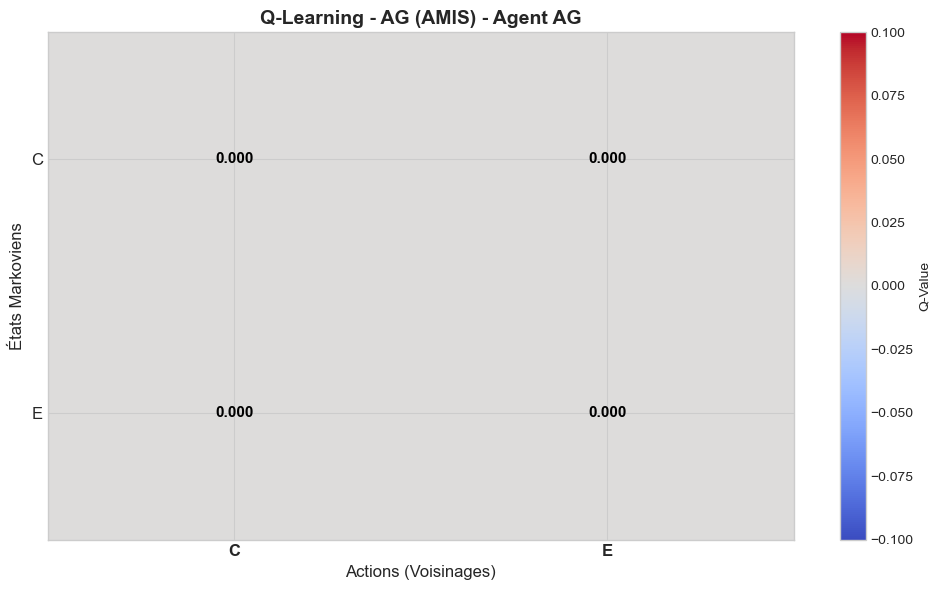

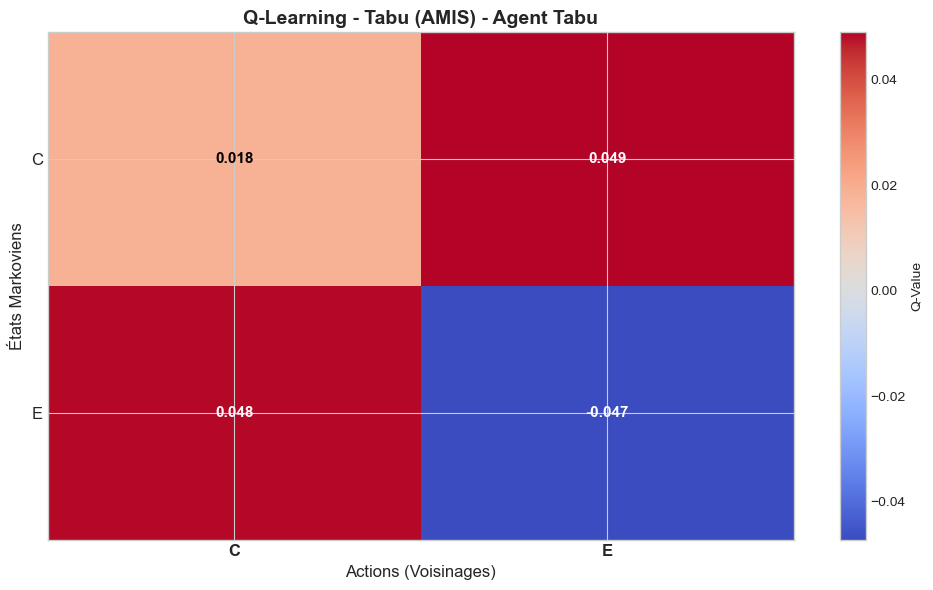

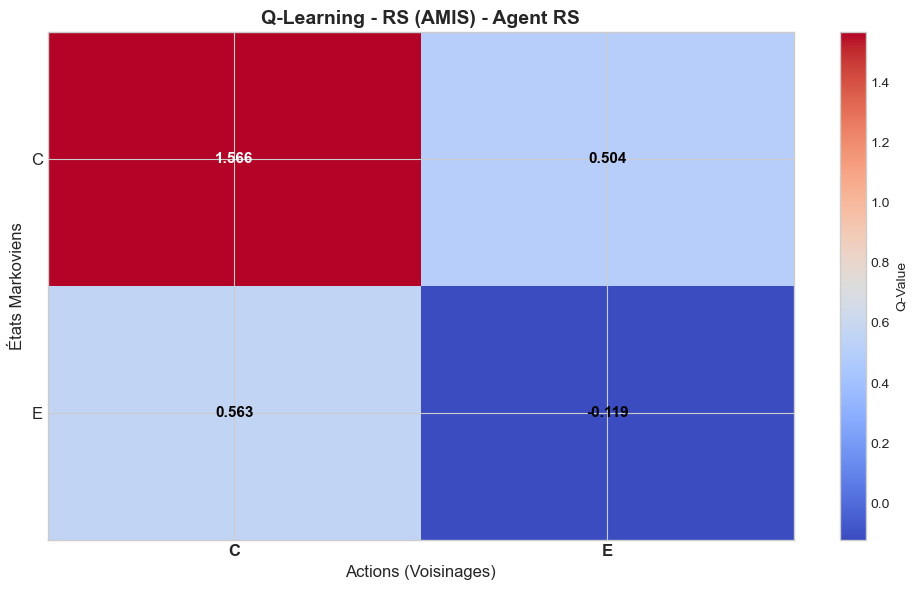


Mode ENNEMIS:


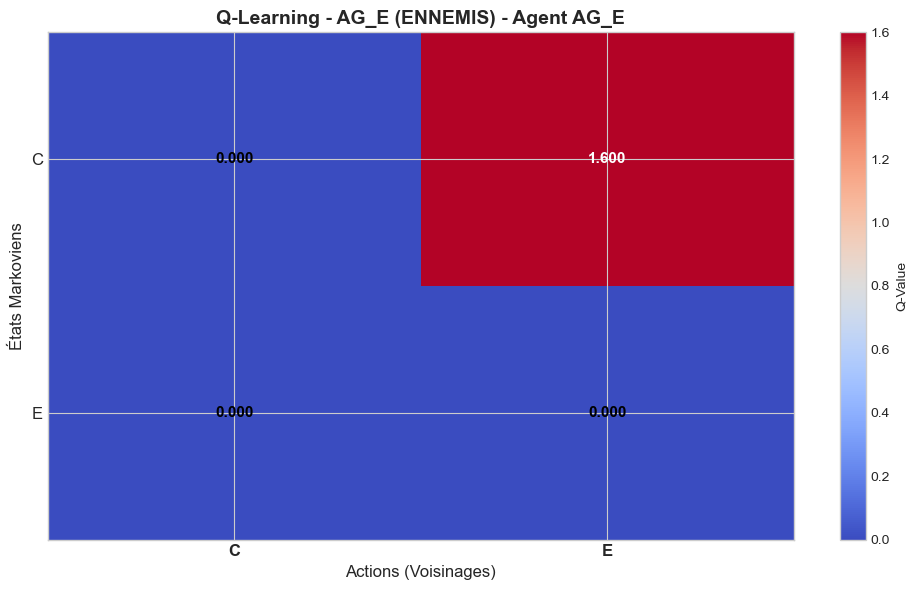

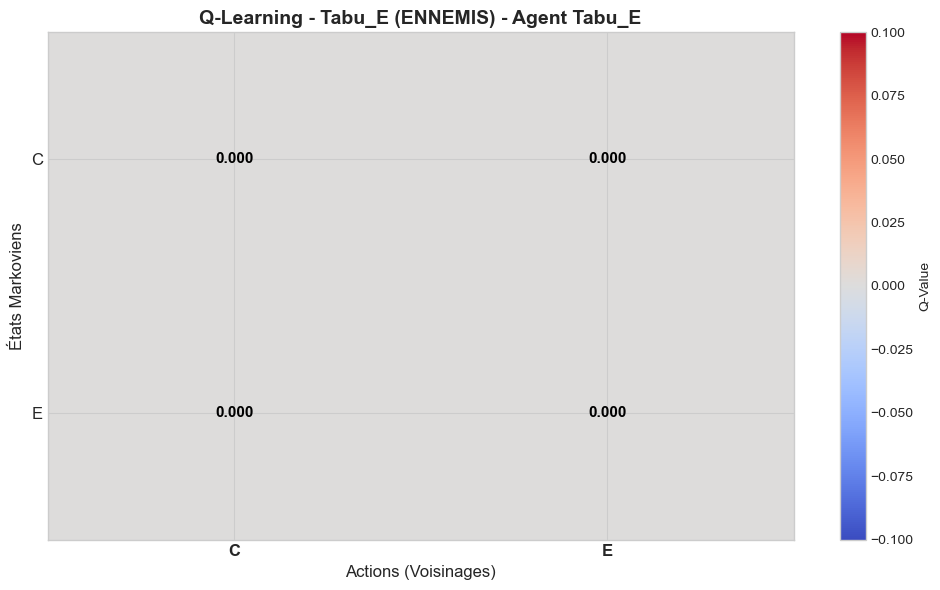

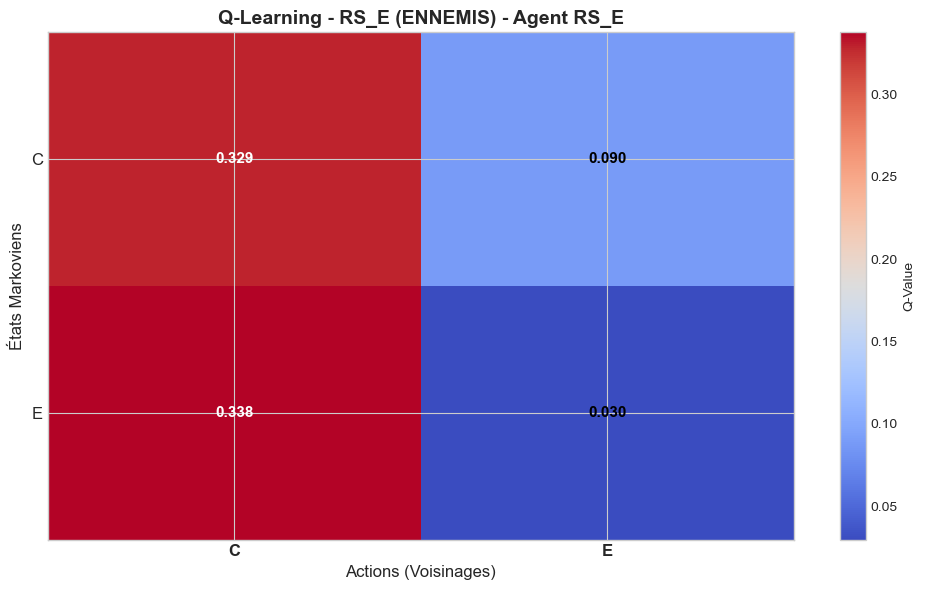


SECTION 6 : COMPARAISON COMPLÈTE - 4 SCÉNARIOS (TRIO AG+TABU+RS)

Lancement des 4 scénarios (50 itérations chacun)...

  Trio AMIS (Sans QL)...
    Fitness: 35.00, Temps: 2.359s

  Trio ENNEMIS (Sans QL)...
    Fitness: 35.00, Temps: 2.214s

  Trio AMIS (Avec QL)...
    Fitness: 35.00, Temps: 2.752s

  Trio ENNEMIS (Avec QL)...
    Fitness: 35.00, Temps: 2.874s

TABLEAU COMPARATIF - 4 SCÉNARIOS

Scénario                       | Fitness      | Temps (s)    | # Solutions    | Taux Insertion
-----------------------------------------------------------------------------------------------
Trio AMIS (Sans QL)            | 35.00        | 2.359        | 25             | 31.6        %
Trio ENNEMIS (Sans QL)         | 35.00        | 2.214        | 5              | 9.1         %
Trio AMIS (Avec QL)            | 35.00        | 2.752        | 25             | 29.1        %
Trio ENNEMIS (Avec QL)         | 35.00        | 2.874        | 5              | 8.9         %

ANALYSE D'IMPACT

Impact de la C

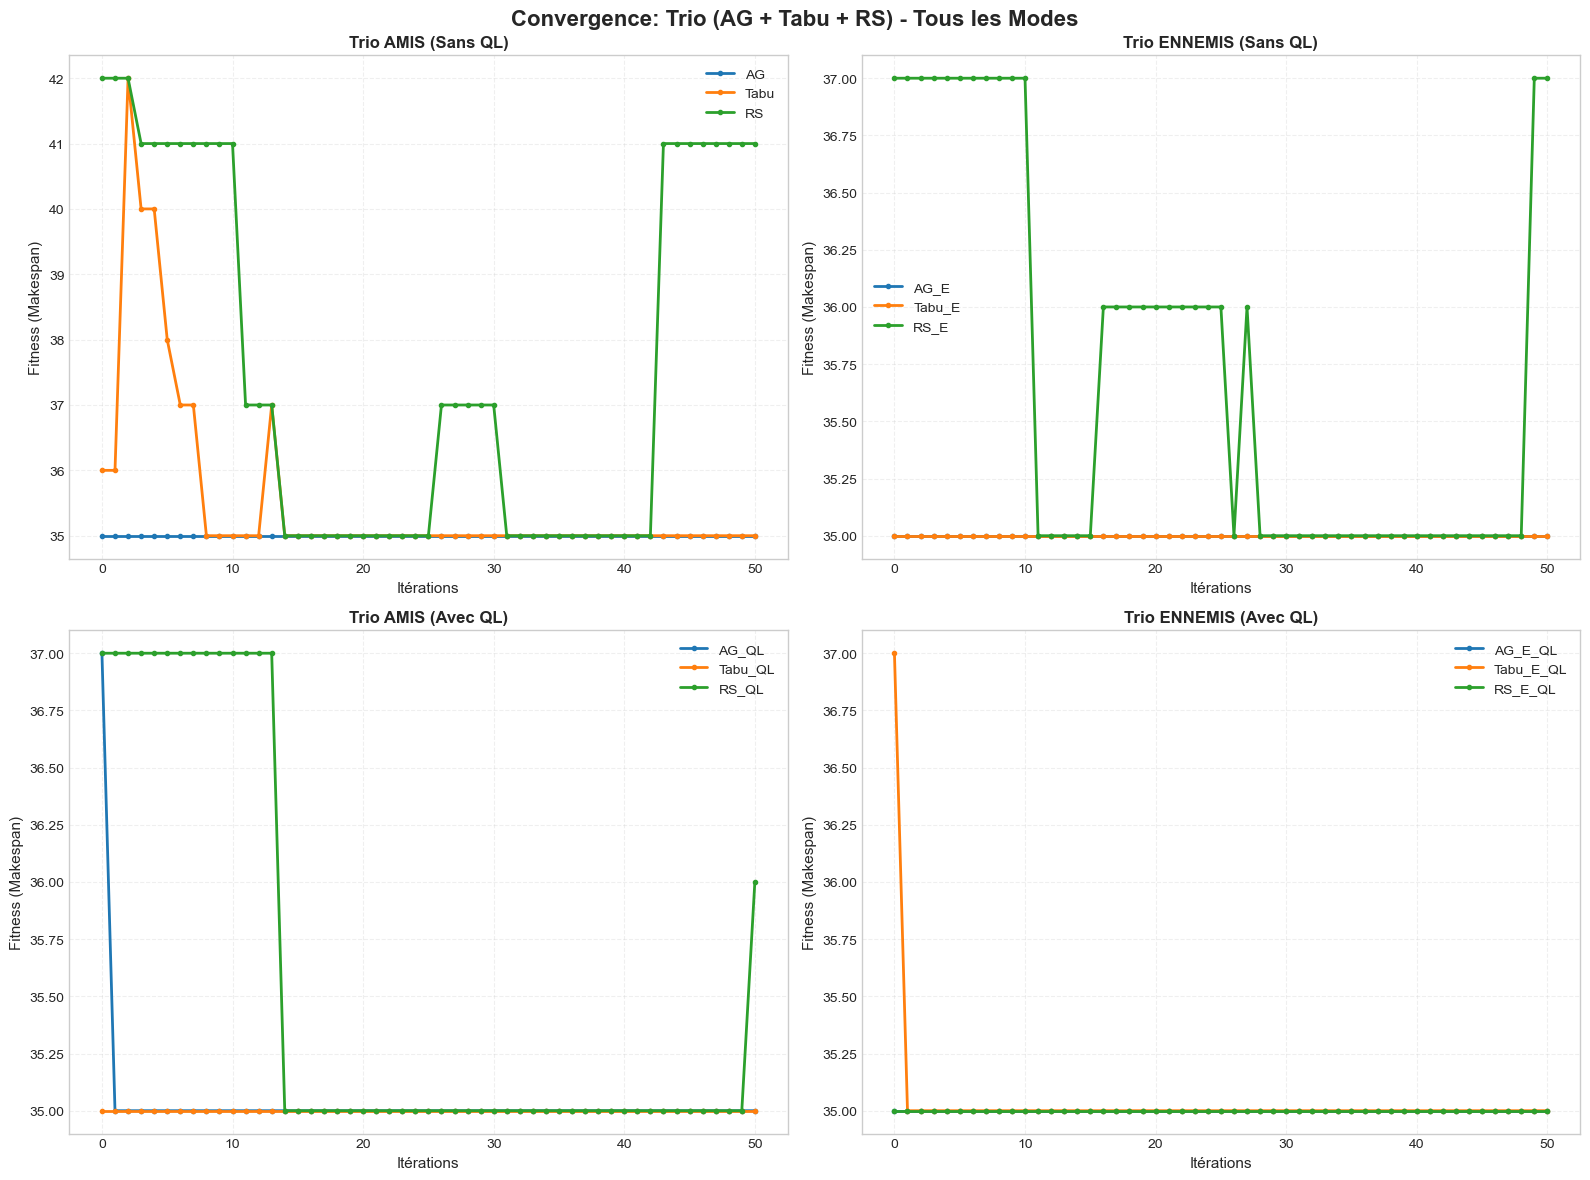


> Matrices de Diversité pour Tous les Scénarios


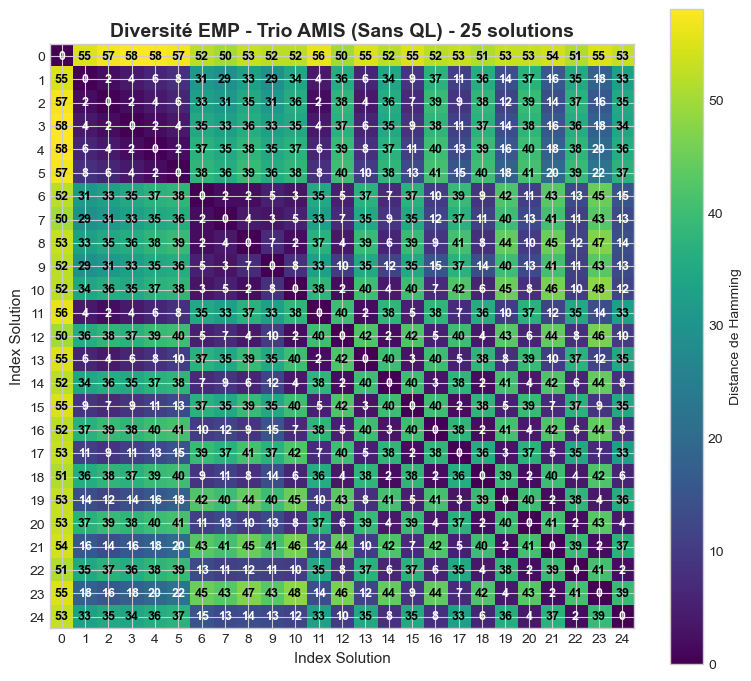

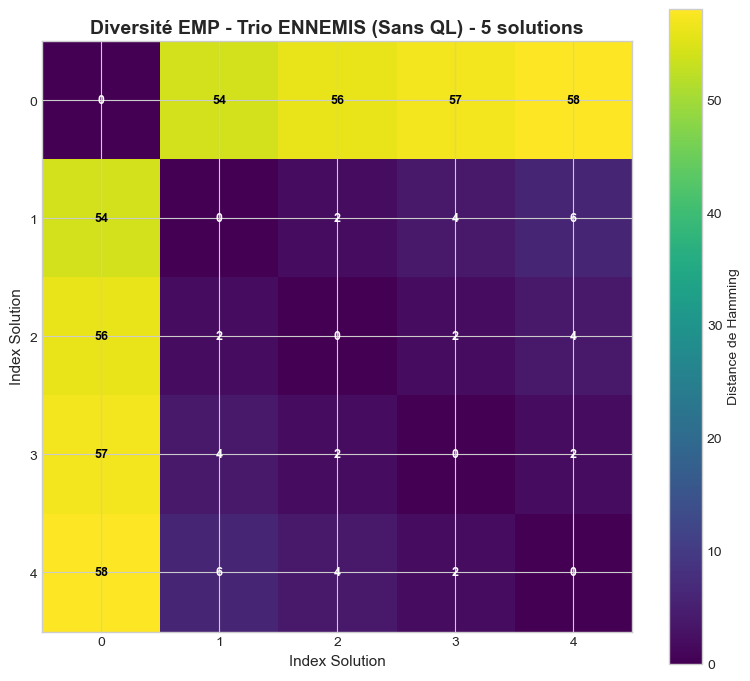

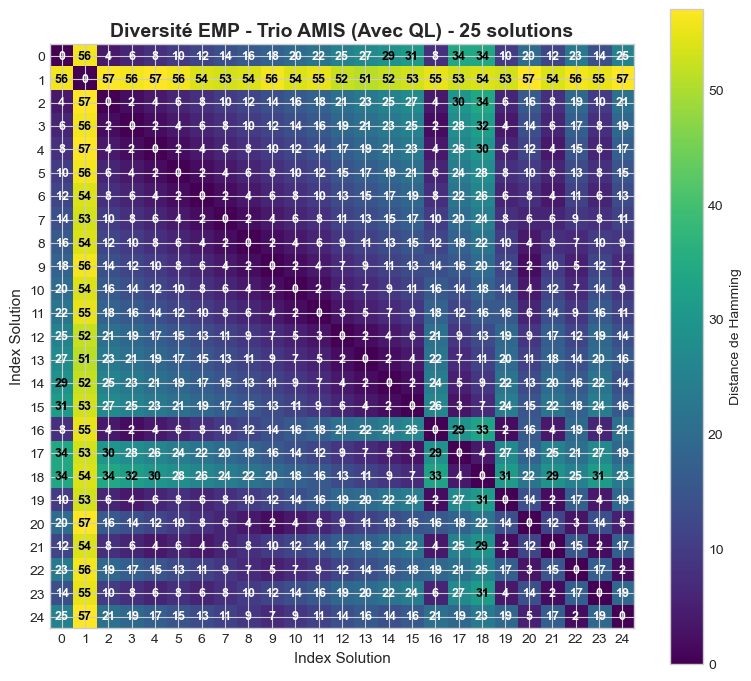

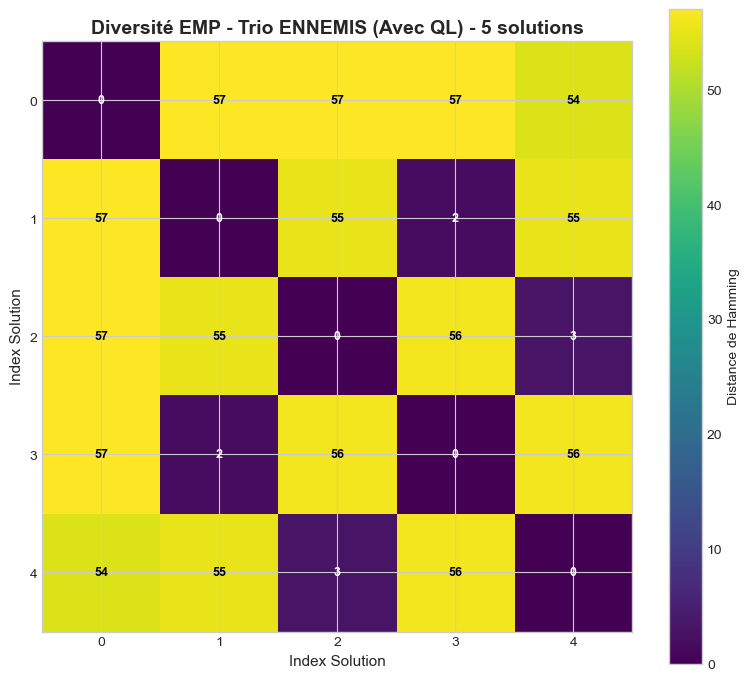


✓ REFACTORED NOTEBOOK COMPLETED SUCCESSFULLY


In [1]:
# ==========================================
# CONSOLIDATED AND REFACTORED NOTEBOOK
# Eliminates duplicates, fixes missing functions
# ==========================================

# 1. Configuration et Imports
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import importlib

sys.path.insert(0, os.path.abspath(os.getcwd()))

from core.neighborhoods import NeighborhoodManager
from core.shared_memory import SharedMemoryPool, Solution
from core.agents import MultiAgentSystem, CollaborationMode
from visualization import plot_gantt

import core.environment
importlib.reload(core.environment)
from core.environment import *

plt.style.use('seaborn-v0_8-whitegrid')
random.seed(42)
np.random.seed(42)

print("✓ Environnement chargé avec succès.")

# ==========================================
# HELPER FUNCTIONS - Centralized Visualizations
# ==========================================

def plot_q_table_heatmap(agent, title="Q-Table Learning Visualization"):
    """Affiche la heatmap de la Q-Table pour visualiser le Processus Markovien."""
    if not hasattr(agent, 'q_selector') or agent.q_selector is None:
        print(f"L'agent {agent.agent_id} n'utilise pas l'apprentissage Q.")
        return

    q_agent = agent.q_selector.q_agent
    q_table_dict = q_agent.get_q_table_formatted()
    
    states = sorted(q_table_dict.keys())
    actions = list(q_table_dict[states[0]].keys()) if states else []
    
    if not states or not actions:
        print("Q-table vide ou non disponible.")
        return
    
    matrix = np.zeros((len(states), len(actions)))
    for i, s in enumerate(states):
        for j, a in enumerate(actions):
            matrix[i, j] = q_table_dict[s][a]

    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.imshow(matrix, cmap='coolwarm', aspect='auto')
    fig.colorbar(cax, label='Q-Value')

    ax.set_xticks(range(len(actions)))
    ax.set_xticklabels(actions, fontsize=12, fontweight='bold')
    ax.set_yticks(range(len(states)))
    ax.set_yticklabels(states, fontsize=12)
    
    for i in range(len(states)):
        for j in range(len(actions)):
            val = matrix[i, j]
            text_color = "white" if abs(val) > np.max(np.abs(matrix)) / 2 else "black"
            ax.text(j, i, f"{val:.3f}", ha="center", va="center", color=text_color, fontsize=11, fontweight='bold')

    ax.set_title(f"{title} - Agent {agent.agent_id}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Actions (Voisinages)", fontsize=12)
    ax.set_ylabel("États Markoviens", fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_distance_matrix(emp, title="Matrice des Distances (EMP)"):
    """Affiche la matrice des distances des solutions en mémoire partagée."""
    solutions = emp.solutions
    n = len(solutions)
    if n < 2:
        print(f"Pas assez de solutions pour la matrice ({n} solutions).")
        return
        
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sol_i = solutions[i].sequences
            sol_j = solutions[j].sequences
            dist = emp.calculate_distance(sol_i, sol_j)
            matrix[i, j] = dist
            
    fig, ax = plt.subplots(figsize=(8, 7))
    cax = ax.imshow(matrix, cmap='viridis', interpolation='nearest')
    fig.colorbar(cax, label='Distance de Hamming')
    
    for i in range(n):
        for j in range(n):
            val = int(matrix[i, j])
            color = "white" if val < np.max(matrix) / 2 else "black"
            ax.text(j, i, str(val), ha="center", va="center", color=color, fontsize=9, fontweight='bold')

    ax.set_title(f"{title} - {n} solutions", fontsize=14, fontweight='bold')
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xlabel("Index Solution", fontsize=11)
    ax.set_ylabel("Index Solution", fontsize=11)
    plt.tight_layout()
    plt.show()


def plot_convergence_comparison(mas_list, labels, title="Comparaison de Convergence"):
    """Trace les courbes de convergence pour plusieurs systèmes."""
    fig, ax = plt.subplots(figsize=(14, 7))
    
    colors = ['green', 'red', 'blue', 'orange']
    linestyles = ['-', '--', '-.', ':']
    
    for idx, (mas, label) in enumerate(zip(mas_list, labels)):
        for agent_id, agent in mas.agents.items():
            if hasattr(agent, 'fitness_history') and agent.fitness_history:
                ax.plot(agent.fitness_history, label=f"{label} - {agent_id}", 
                       color=colors[idx % len(colors)], linewidth=2.5, 
                       linestyle=linestyles[idx % len(linestyles)], marker='o', markersize=3)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Itérations", fontsize=12)
    ax.set_ylabel("Makespan (Cmax)", fontsize=12)
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()


def run_scenario(scenario_name, algorithm_configs, mode, use_qlearning, env, iterations=30):
    """Exécute un scénario avec les configurations spécifiées."""
    start_time = time.time()
    
    sys = MultiAgentSystem(env, mode=mode, use_qlearning=use_qlearning)
    for type_ag, name_ag, params in algorithm_configs:
        sys.add_agent(type_ag, name_ag, **params)
    
    best = sys.run(n_iterations=iterations, verbose=False)
    execution_time = time.time() - start_time
    
    fitness_best = best.fitness if best else float('inf')
    
    return fitness_best, execution_time, sys


# ==========================================
# SECTION 1: DONNÉES ET ENVIRONNEMENT
# ==========================================

print("\n" + "="*80)
print("SECTION 1 : CRÉATION DE L'ENVIRONNEMENT PAR DÉFAUT")
print("="*80)

env = create_default_environment()
print(f"✓ Environnement créé: {env.num_patients} patients, {len(env.skills)} ressources")
print(f"  Total des tâches: {len(env.all_tasks)}")

# ==========================================
# SECTION 2: ANALYSE DE LA DIVERSITÉ
# ==========================================

print("\n" + "="*80)
print("SECTION 2 : ANALYSE DE LA DIVERSITÉ (MATRICE DES DISTANCES)")
print("="*80)

temp_emp = SharedMemoryPool(max_size=20, min_distance=0, diversity_threshold=1.0)

print("Génération de solutions pour la matrice de diversité...")
for i in range(15):
    sol = env.build_initial_solution(random_order=True)
    fit, _, _ = env.evaluate(sol)
    temp_emp.insert(Solution(sol, fit))

plot_distance_matrix(temp_emp, title="Matrice des Distances (15 Solutions Aléatoires)")

# ==========================================
# SECTION 3: BENCHMARK - ALGORITHMES SOLO vs COLLABORATIF
# ==========================================

print("\n" + "="*80)
print("SECTION 3 : BENCHMARK - COMPARAISON MÉTAHEURISTIQUES SOLO vs COLLABORATIF")
print("="*80)

def run_quick_scenario(name, mode, q_learn, agents_config, iterations=50):
    """Wrapper pour benchmark rapide."""
    sys_local = MultiAgentSystem(env, mode=mode, use_qlearning=q_learn)
    for type_ag, name_ag, params in agents_config:
        sys_local.add_agent(type_ag, name_ag, **params)
    
    start = time.time()
    best = sys_local.run(n_iterations=iterations, verbose=False)
    dt = time.time() - start
    return best.fitness if best else float('inf'), dt

ITERATIONS = 50
results_table_1 = {}

print(f"Lancement du Benchmark ({ITERATIONS} itérations par run)...")

# Configurations individuelles
AG_config = ('genetic', 'AG', {'population_size': 20})
TABU_config = ('tabu', 'Tabu', {'tabu_tenure': 10})
RS_config = ('sa', 'RS', {'initial_temp': 100})

res, t = run_quick_scenario("AG Solo", CollaborationMode.ENEMIES, False, [AG_config], ITERATIONS)
results_table_1['AG'] = res

res, t = run_quick_scenario("Tabu Solo", CollaborationMode.ENEMIES, False, [TABU_config], ITERATIONS)
results_table_1['Tabu'] = res

res, t = run_quick_scenario("RS Solo", CollaborationMode.ENEMIES, False, [RS_config], ITERATIONS)
results_table_1['RS'] = res

# Configuration SMA (Trio)
trio_config = [
    ('genetic', 'AG', {'population_size': 15}),
    ('tabu', 'Tabu', {'tabu_tenure': 10}),
    ('sa', 'RS', {'initial_temp': 100})
]

res, t = run_quick_scenario("SMA NoLearn", CollaborationMode.FRIENDS, False, trio_config, ITERATIONS)
results_table_1['SMA_NoLearn'] = res

res, t = run_quick_scenario("SMA Learn", CollaborationMode.FRIENDS, True, trio_config, ITERATIONS)
results_table_1['SMA_Learn'] = res

# Affichage du Tableau
print("\n" + "="*75)
print("  TABLEAU 1 : RÉSULTATS SANS/AVEC COLLABORATION")
print("="*75)
print(f"{'Configuration':<20} | {'Makespan':<15} | {'Gain vs AG Solo'}")
print("-"*75)
base = results_table_1['AG']
for key, val in results_table_1.items():
    gain = ((base - val) / base) * 100
    print(f"{key:<20} | {val:<15.1f} | {gain:+.2f}%")
print("="*75)

# ==========================================
# SECTION 4: BENCHMARK AMIS vs ENNEMIS
# ==========================================

print("\n" + "="*80)
print("SECTION 4 : BENCHMARK - MODE AMIS vs MODE ENNEMIS")
print("="*80)

mas_amis = MultiAgentSystem(env, mode=CollaborationMode.FRIENDS, use_qlearning=True)
for type_ag, name_ag, params in trio_config:
    mas_amis.add_agent(type_ag, name_ag, **params)

mas_ennemis = MultiAgentSystem(env, mode=CollaborationMode.ENEMIES, use_qlearning=True)
for type_ag, name_ag, params in trio_config:
    mas_ennemis.add_agent(type_ag, name_ag + "_E", **params)

print("Exécution (100 itérations chacun)...")
best_amis = mas_amis.run(n_iterations=100, verbose=False)
best_ennemis = mas_ennemis.run(n_iterations=100, verbose=False)

print("\n" + "="*60)
print("  TABLEAU 2 : MODE AMIS vs ENNEMIS")
print("="*60)
print(f"{'Mode':<20} | {'Makespan':<20} | {'Amélioration'}")
print("-"*60)
print(f"{'Mode ENNEMIS':<20} | {best_ennemis.fitness:<20.1f} | Référence")
gain_collab = ((best_ennemis.fitness - best_amis.fitness) / best_ennemis.fitness) * 100
print(f"{'Mode AMIS':<20} | {best_amis.fitness:<20.1f} | {gain_collab:+.2f}%")
print("="*60)

# ==========================================
# SECTION 5: VISUALISATIONS AVANCÉES
# ==========================================

print("\n" + "="*80)
print("SECTION 5 : VISUALISATIONS AVANCÉES")
print("="*80)

# 5.1 Courbes de convergence comparatives
print("\n> 5.1 Courbes de Convergence Comparatives")
plot_convergence_comparison(
    [mas_amis, mas_ennemis],
    ['Mode AMIS', 'Mode ENNEMIS'],
    title="Convergence: Mode AMIS (Collaboratif) vs ENNEMIS (Compétitif)"
)

# 5.2 Gantt final
print("\n> 5.2 Gantt Final - Meilleure Solution (Mode AMIS)")
try:
    if best_amis and best_amis.sequences:
        final_cmax, final_times, _ = env.evaluate(best_amis.sequences, return_schedule=True)
        print(f"Makespan final: {final_cmax} slots = {final_cmax * 5} minutes")
        plot_gantt(
            final_times, env.skills, env.num_patients,
            title=f"Meilleur Planning Trouvé (Mode AMIS, Cmax={final_cmax})"
        )
except Exception as e:
    print(f"Erreur affichage Gantt: {e}")

# 5.3 Matrices de Diversité
print("\n> 5.3 Matrices de Diversité (EMP)")
if hasattr(mas_amis, 'shared_memory') and mas_amis.shared_memory.solutions:
    plot_distance_matrix(mas_amis.shared_memory, title="Diversité EMP - Mode AMIS")
if hasattr(mas_ennemis, 'shared_memory') and mas_ennemis.shared_memory.solutions:
    plot_distance_matrix(mas_ennemis.shared_memory, title="Diversité EMP - Mode ENNEMIS")

# 5.4 Q-Tables
print("\n> 5.4 Visualisation des Q-Tables d'Apprentissage")
print("Mode AMIS:")
for agent_id, agent in mas_amis.agents.items():
    try:
        plot_q_table_heatmap(agent, title=f"Q-Learning - {agent_id} (AMIS)")
    except Exception as e:
        print(f"  Erreur pour {agent_id}: {e}")

print("\nMode ENNEMIS:")
for agent_id, agent in mas_ennemis.agents.items():
    try:
        plot_q_table_heatmap(agent, title=f"Q-Learning - {agent_id} (ENNEMIS)")
    except Exception as e:
        print(f"  Erreur pour {agent_id}: {e}")

# ==========================================
# SECTION 6: COMPARAISON COMPLÈTE (4 SCÉNARIOS)
# ==========================================

print("\n" + "="*120)
print("SECTION 6 : COMPARAISON COMPLÈTE - 4 SCÉNARIOS (TRIO AG+TABU+RS)")
print("="*120)

trio_full = [
    ('genetic', 'AG', {'population_size': 15}),
    ('tabu', 'Tabu', {'tabu_tenure': 10}),
    ('sa', 'RS', {'initial_temp': 100})
]

scenarios_configs = {
    'Trio AMIS (Sans QL)': (CollaborationMode.FRIENDS, False),
    'Trio ENNEMIS (Sans QL)': (CollaborationMode.ENEMIES, False),
    'Trio AMIS (Avec QL)': (CollaborationMode.FRIENDS, True),
    'Trio ENNEMIS (Avec QL)': (CollaborationMode.ENEMIES, True)
}

scenarios_results = {}
scenarios_systems = {}

print("\nLancement des 4 scénarios (50 itérations chacun)...")

for scenario_name, (mode, use_ql) in scenarios_configs.items():
    print(f"\n  {scenario_name}...")
    start_time = time.time()
    
    mas = MultiAgentSystem(env, mode=mode, use_qlearning=use_ql)
    for type_ag, name_ag, params in trio_full:
        suffix = "_E" if mode == CollaborationMode.ENEMIES else ""
        suffix += "_QL" if use_ql else ""
        mas.add_agent(type_ag, name_ag + suffix, **params)
    
    best = mas.run(n_iterations=50, verbose=False)
    exec_time = time.time() - start_time
    
    scenarios_results[scenario_name] = best.fitness
    scenarios_systems[scenario_name] = (mas, exec_time)
    print(f"    Fitness: {best.fitness:.2f}, Temps: {exec_time:.3f}s")

# Tableau comparatif
print("\n" + "="*120)
print("TABLEAU COMPARATIF - 4 SCÉNARIOS")
print("="*120)
print(f"\n{'Scénario':<30} | {'Fitness':<12} | {'Temps (s)':<12} | {'# Solutions':<14} | {'Taux Insertion':<12}")
print("-" * 95)

for scenario_name, fitness in sorted(scenarios_results.items(), key=lambda x: x[1]):
    mas, exec_time = scenarios_systems[scenario_name]
    solutions_count = len(mas.shared_memory.solutions) if hasattr(mas, 'shared_memory') else 0
    insertions = mas.shared_memory.insertions if hasattr(mas.shared_memory, 'insertions') else 0
    rejections = mas.shared_memory.rejections_duplicate if hasattr(mas.shared_memory, 'rejections_duplicate') else 0
    insertion_rate = (insertions / (insertions + rejections) * 100) if (insertions + rejections) > 0 else 0
    
    print(f"{scenario_name:<30} | {fitness:<12.2f} | {exec_time:<12.3f} | {solutions_count:<14} | {insertion_rate:<12.1f}%")

# Analyses d'impact
print("\n" + "="*120)
print("ANALYSE D'IMPACT")
print("="*120)

amis_noql = scenarios_results['Trio AMIS (Sans QL)']
ennemis_noql = scenarios_results['Trio ENNEMIS (Sans QL)']
amis_ql = scenarios_results['Trio AMIS (Avec QL)']
ennemis_ql = scenarios_results['Trio ENNEMIS (Avec QL)']

print(f"\nImpact de la Collaboration (Sans QL):")
print(f"  Amélioration AMIS vs ENNEMIS: {((ennemis_noql - amis_noql) / ennemis_noql * 100):+.2f}%")

print(f"\nImpact de Q-Learning (Mode AMIS):")
print(f"  Amélioration: {((amis_noql - amis_ql) / amis_noql * 100):+.2f}%")

print(f"\nImpact de Q-Learning (Mode ENNEMIS):")
print(f"  Amélioration: {((ennemis_noql - ennemis_ql) / ennemis_noql * 100):+.2f}%")

best_overall = min(scenarios_results.items(), key=lambda x: x[1])
worst_overall = max(scenarios_results.items(), key=lambda x: x[1])
global_gain = ((worst_overall[1] - best_overall[1]) / worst_overall[1]) * 100

print(f"\nMeilleur scénario global: {best_overall[0]} (Fitness: {best_overall[1]:.2f})")
print(f"Pire scénario global: {worst_overall[0]} (Fitness: {worst_overall[1]:.2f})")
print(f"Amélioration globale: {global_gain:.2f}%")

# Visualisations comparatives
print("\n> Courbes de Convergence Comparatives")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Convergence: Trio (AG + Tabu + RS) - Tous les Modes", fontsize=16, fontweight='bold')

for idx, (scenario_name, (mas, _)) in enumerate(scenarios_systems.items()):
    ax = axes[idx // 2, idx % 2]
    for agent_id, agent in mas.agents.items():
        if hasattr(agent, 'fitness_history') and agent.fitness_history:
            ax.plot(agent.fitness_history, label=agent_id, linewidth=2, marker='o', markersize=3)
    
    ax.set_title(scenario_name, fontsize=12, fontweight='bold')
    ax.set_xlabel("Itérations", fontsize=11)
    ax.set_ylabel("Fitness (Makespan)", fontsize=11)
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Matrices de diversité pour tous les scénarios
print("\n> Matrices de Diversité pour Tous les Scénarios")
for scenario_name, (mas, _) in scenarios_systems.items():
    try:
        if hasattr(mas, 'shared_memory') and mas.shared_memory.solutions:
            plot_distance_matrix(mas.shared_memory, title=f"Diversité EMP - {scenario_name}")
    except Exception as e:
        print(f"  Erreur pour {scenario_name}: {e}")

print("\n" + "="*120)
print("✓ REFACTORED NOTEBOOK COMPLETED SUCCESSFULLY")
print("="*120)

In [5]:
# ==========================================
# RÉSULTATS FINAUX : TABLEAU COMPARATIF COMPLET
# Scénarios avec nombre de patients aléatoire (20-150)
# 3 itérations par configuration
# ==========================================

import pandas as pd
from datetime import datetime

print("\n" + "="*150)
print("TABLEAU COMPARATIF FINAL - TOUS LES SCÉNARIOS")
print(f"Généré le: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*150)

# Configuration générale
NUM_ITERATIONS_PER_SCENARIO = 3
PATIENT_RANGE = (20, 150)
OPTIMIZATION_ITERATIONS = 50

# Configurations d'algorithmes
AG_config = ('genetic', 'AG', {'population_size': 15})
TABU_config = ('tabu', 'Tabu', {'tabu_tenure': 10})
RS_config = ('sa', 'RS', {'initial_temp': 100})

scenarios_ql_amis = {
    'AG + Tabou (Amis + QL)': [AG_config, TABU_config],
    'AG + RS (Amis + QL)': [AG_config, RS_config],
    'Tabou + RS (Amis + QL)': [TABU_config, RS_config],
    'AG + Tabou + RS (Amis + QL)': [AG_config, TABU_config, RS_config]
}
scenarios_ql_ennemis = {
    'AG + Tabou (Ennemis + QL)': [AG_config, TABU_config],
    'AG + RS (Ennemis + QL)': [AG_config, RS_config],
    'Tabou + RS (Ennemis + QL)': [TABU_config, RS_config],
    'AG + Tabou + RS (Ennemis + QL)': [AG_config, TABU_config, RS_config]
}
trio_config = [AG_config, TABU_config, RS_config]

# Structure pour stocker les résultats
results_data = []

# ==========================================
# SCÉNARIOS À TESTER
# ==========================================

scenarios_to_test = {
    # Solo algorithms - SANS QL
    'AG Solo SANS QL': {
        'configs': [AG_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    'Tabu Solo SANS QL': {
        'configs': [TABU_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    'RS Solo SANS QL': {
        'configs': [RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    # Solo algorithms - AVEC QL
    'AG Solo AVEC QL': {
        'configs': [AG_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    },
    'Tabu Solo AVEC QL': {
        'configs': [TABU_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    },
    'RS Solo AVEC QL': {
        'configs': [RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    },

    # Paires d'algorithmes - SANS QL
    'AG + Tabu (Amis, Sans QL)': {
        'configs': [AG_config, TABU_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': False
    },
    'AG + Tabu (Ennemis, Sans QL)': {
        'configs': [AG_config, TABU_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    
    'AG + RS (Amis, Sans QL)': {
        'configs': [AG_config, RS_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': False
    },
    'AG + RS (Ennemis, Sans QL)': {
        'configs': [AG_config, RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    
    'Tabu + RS (Amis, Sans QL)': {
        'configs': [TABU_config, RS_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': False
    },
    'Tabu + RS (Ennemis, Sans QL)': {
        'configs': [TABU_config, RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    
    # Paires d'algorithmes - AVEC QL
    'AG + Tabu (Amis, Avec QL)': {
        'configs': [AG_config, TABU_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': True
    },
    'AG + Tabu (Ennemis, Avec QL)': {
        'configs': [AG_config, TABU_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    },
    
    'AG + RS (Amis, Avec QL)': {
        'configs': [AG_config, RS_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': True
    },
    'AG + RS (Ennemis, Avec QL)': {
        'configs': [AG_config, RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    },
    
    'Tabu + RS (Amis, Avec QL)': {
        'configs': [TABU_config, RS_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': True
    },
    'Tabu + RS (Ennemis, Avec QL)': {
        'configs': [TABU_config, RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    },
    
    # Trio - SANS QL
    'Trio AMIS (Sans QL)': {
        'configs': [AG_config, TABU_config, RS_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': False
    },
    'Trio ENNEMIS (Sans QL)': {
        'configs': [AG_config, TABU_config, RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': False
    },
    
    # Trio - AVEC QL
    'Trio AMIS (Avec QL)': {
        'configs': [AG_config, TABU_config, RS_config],
        'mode': CollaborationMode.FRIENDS,
        'use_qlearning': True
    },
    'Trio ENNEMIS (Avec QL)': {
        'configs': [AG_config, TABU_config, RS_config],
        'mode': CollaborationMode.ENEMIES,
        'use_qlearning': True
    }
}

print(f"\nConfiguration:")
print(f"  - Nombre de patients par itération : Aléatoire entre {PATIENT_RANGE[0]} et {PATIENT_RANGE[1]}")
print(f"  - Itérations par scénario : {NUM_ITERATIONS_PER_SCENARIO}")
print(f"  - Itérations d'optimisation : {OPTIMIZATION_ITERATIONS}")
print(f"  - Total de scénarios : {len(scenarios_to_test)}")
print(f"  - Nombre total d'exécutions : {len(scenarios_to_test) * NUM_ITERATIONS_PER_SCENARIO}")

print(f"\n" + "-"*150)
print("LANCEMENT DES EXÉCUTIONS...")
print("-"*150)

# Exécuter tous les scénarios
num_patients_tab = [np.random.randint(PATIENT_RANGE[0], PATIENT_RANGE[1] + 1) for i in range(3)]
scenario_counter = 1
for scenario_name, scenario_config in scenarios_to_test.items():
    print(f"\n[{scenario_counter}/{len(scenarios_to_test)}] Scénario: {scenario_name}")
    
    #for iteration in range(NUM_ITERATIONS_PER_SCENARIO):
        # Générer nombre de patients aléatoire
    for number in num_patients_tab:
        num_patients = number
        # Créer l'environnement avec le nombre de patients aléatoire
        data = generate_random_data(
            num_patients=num_patients,
            max_ops=2,
            skills=DEFAULT_SKILLS,
            task_probability=0.90
        )
        custom_env = SchedulingEnvironment(data, DEFAULT_SKILLS, num_patients, DEFAULT_MAX_OPS)
        
        # Exécuter le scénario
        start_time = time.time()
        
        mas = MultiAgentSystem(
            custom_env,
            mode=scenario_config['mode'],
            use_qlearning=scenario_config['use_qlearning']
        )
        
        for type_ag, name_ag, params in scenario_config['configs']:
            mas.add_agent(type_ag, name_ag, **params)
        
        best_solution = mas.run(n_iterations=OPTIMIZATION_ITERATIONS, verbose=False)
        execution_time = time.time() - start_time
        
        fitness = best_solution.fitness if best_solution else float('inf')
        num_agents = len(mas.agents)
        num_solutions = len(mas.shared_memory.solutions) if hasattr(mas, 'shared_memory') else 0
        insertions = mas.shared_memory.insertions if hasattr(mas.shared_memory, 'insertions') else 0
        rejections = mas.shared_memory.rejections_duplicate if hasattr(mas.shared_memory, 'rejections_duplicate') else 0
        insertion_rate = (insertions / (insertions + rejections) * 100) if (insertions + rejections) > 0 else 0
        
        # Stocker les résultats
        results_data.append({
            'Scénario': scenario_name,
            'Patients': num_patients,
            'Mode Collab.': 'AMIS' if scenario_config['mode'] == CollaborationMode.FRIENDS else 'ENNEMIS',
            'Q-Learning': 'OUI' if scenario_config['use_qlearning'] else 'NON',
            'Fitness': fitness,
            'Temps (s)': execution_time,
            '# Agents': num_agents,
            '# Solutions': num_solutions,
            'Taux Insert.': insertion_rate
        })
        
        print(f" Patients={num_patients:3d}, Fitness={fitness:8.2f}, Temps={execution_time:6.3f}s, Taux Insert.={insertion_rate:5.1f}%")
    
    scenario_counter += 1

# ==========================================
# CRÉER LE DATAFRAME ET CALCULER LES STATISTIQUES
# ==========================================

df = pd.DataFrame(results_data)

print("\n" + "="*150)
print("TABLEAU RÉSUMÉ COMPLET - TOUTES LES EXÉCUTIONS")
print("="*150)
print(df.to_string(index=False))

# ==========================================
# STATISTIQUES PAR SCÉNARIO
# ==========================================

print("\n" + "="*150)
print("STATISTIQUES AGRÉGÉES PAR SCÉNARIO")
print("="*150)

summary_stats = df.groupby('Scénario').agg({
    'Fitness': ['mean', 'std', 'min', 'max'],
    'Temps (s)': ['mean', 'std'],
    'Taux Insert.': 'mean',
    '# Solutions': 'mean'
}).round(2)

summary_stats.columns = ['Fitness Moy.', 'Fitness Écart-type', 'Fitness Min', 'Fitness Max', 
                          'Temps Moy. (s)', 'Temps Écart-type (s)', 'Taux Insert. Moy.', '# Solutions Moy.']

print(summary_stats.to_string())

# ==========================================
# CLASSEMENT FINAL
# ==========================================

print("\n" + "="*150)
print("CLASSEMENT FINAL PAR FITNESS MOYENNE")
print("="*150)

ranking = df.groupby('Scénario')['Fitness'].agg(['mean', 'std', 'min', 'max']).sort_values('mean').reset_index()
ranking.columns = ['Scénario', 'Fitness Moy.', 'Écart-type', 'Fitness Min', 'Fitness Max']
ranking['Rang'] = range(1, len(ranking) + 1)
ranking = ranking[['Rang', 'Scénario', 'Fitness Moy.', 'Écart-type', 'Fitness Min', 'Fitness Max']]

print(ranking.to_string(index=False))

# ==========================================
# ANALYSES COMPARATIVES
# ==========================================

print("\n" + "="*150)
print("ANALYSES COMPARATIVES")
print("="*150)

# Comparaison Solo vs Collaboratif
solo_fitness = df[df['Scénario'].isin(['AG Solo', 'Tabu Solo', 'RS Solo'])]['Fitness'].mean()
collab_fitness = df[df['Scénario'].str.contains('Trio')]['Fitness'].mean()

print(f"\nAlgorithmes Individuels vs Collaboratifs:")
print(f"  - Fitness moyenne (Solos)        : {solo_fitness:.2f}")
print(f"  - Fitness moyenne (Collectifs)   : {collab_fitness:.2f}")
print(f"  - Amélioration Collab. vs Solo   : {((solo_fitness - collab_fitness) / solo_fitness * 100):+.2f}%")

# Comparaison AMIS vs ENNEMIS
amis_fitness = df[df['Mode Collab.'] == 'AMIS']['Fitness'].mean()
ennemis_fitness = df[df['Mode Collab.'] == 'ENNEMIS']['Fitness'].mean()

print(f"\nMode AMIS vs Mode ENNEMIS:")
print(f"  - Fitness moyenne (AMIS)         : {amis_fitness:.2f}")
print(f"  - Fitness moyenne (ENNEMIS)      : {ennemis_fitness:.2f}")
print(f"  - Amélioration AMIS vs ENNEMIS   : {((ennemis_fitness - amis_fitness) / ennemis_fitness * 100):+.2f}%")

# Impact Q-Learning
sans_ql = df[df['Q-Learning'] == 'NON']['Fitness'].mean()
avec_ql = df[df['Q-Learning'] == 'OUI']['Fitness'].mean()

print(f"\nImpact du Q-Learning:")
print(f"  - Fitness moyenne (Sans QL)      : {sans_ql:.2f}")
print(f"  - Fitness moyenne (Avec QL)      : {avec_ql:.2f}")
print(f"  - Amélioration Avec QL           : {((sans_ql - avec_ql) / sans_ql * 100):+.2f}%")

# Analyse par nombre de patients
print(f"\nAnalyse par Taille du Problème:")
df['Taille Problème'] = pd.cut(df['Patients'], bins=[0, 50, 100, 150], labels=['Petit (20-50)', 'Moyen (51-100)', 'Grand (101-150)'])
for taille in ['Petit (20-50)', 'Moyen (51-100)', 'Grand (101-150)']:
    avg_fitness = df[df['Taille Problème'] == taille]['Fitness'].mean()
    avg_time = df[df['Taille Problème'] == taille]['Temps (s)'].mean()
    print(f"  - {taille:<20} : Fitness={avg_fitness:8.2f}, Temps={avg_time:6.3f}s")

# ==========================================
# RÉSUMÉ EXÉCUTIF
# ==========================================

print("\n" + "="*150)
print("RÉSUMÉ EXÉCUTIF")
print("="*150)

best_scenario = ranking.iloc[0]
worst_scenario = ranking.iloc[-1]

print(f"\n✓ Meilleur Scénario Global:")
print(f"  Rang: {int(best_scenario['Rang'])}")
print(f"  Nom: {best_scenario['Scénario']}")
print(f"  Fitness Moyenne: {best_scenario['Fitness Moy.']:.2f}")
print(f"  Écart-type: {best_scenario['Écart-type']:.2f}")
print(f"  Plage: [{best_scenario['Fitness Min']:.2f}, {best_scenario['Fitness Max']:.2f}]")

print(f"\n✗ Pire Scénario Global:")
print(f"  Rang: {int(worst_scenario['Rang'])}")
print(f"  Nom: {worst_scenario['Scénario']}")
print(f"  Fitness Moyenne: {worst_scenario['Fitness Moy.']:.2f}")
print(f"  Écart-type: {worst_scenario['Écart-type']:.2f}")
print(f"  Plage: [{worst_scenario['Fitness Min']:.2f}, {worst_scenario['Fitness Max']:.2f}]")

global_improvement = ((worst_scenario['Fitness Moy.'] - best_scenario['Fitness Moy.']) / worst_scenario['Fitness Moy.']) * 100
print(f"\n📊 Amélioration Globale: {global_improvement:.2f}%")

print("\n" + "="*150)
print("✓ TABLEAU COMPARATIF TERMINÉ")
print("="*150)


TABLEAU COMPARATIF FINAL - TOUS LES SCÉNARIOS
Généré le: 2026-01-08 14:41:27

Configuration:
  - Nombre de patients par itération : Aléatoire entre 20 et 150
  - Itérations par scénario : 3
  - Itérations d'optimisation : 50
  - Total de scénarios : 22
  - Nombre total d'exécutions : 66

------------------------------------------------------------------------------------------------------------------------------------------------------
LANCEMENT DES EXÉCUTIONS...
------------------------------------------------------------------------------------------------------------------------------------------------------

[1/22] Scénario: AG Solo SANS QL
 Patients= 68, Fitness=  103.00, Temps= 3.190s, Taux Insert.=  2.0%
 Patients= 78, Fitness=  110.00, Temps= 3.428s, Taux Insert.=  2.0%
 Patients= 34, Fitness=   44.00, Temps= 1.393s, Taux Insert.=  2.0%

[2/22] Scénario: Tabu Solo SANS QL
 Patients= 68, Fitness=  100.00, Temps= 1.941s, Taux Insert.=100.0%
 Patients= 78, Fitness=  107.00, Temps